# Exploring ML tradeoffs in classification



Make sure you restart the runtime in the above step.

Nest we will load the libraries we will use. If everything went correctly this cell should not produce an error.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KernelDensity
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

First we are going to walk through the steps of applying machine learning models in Python. We will use the simple linear regression model you are probably familiar with.

The idea here is just to see the typical steps we would take to apply a model.

In [2]:
# Step 1: Generate or Load the Data
# For demonstration purposes, we'll create some synthetic data.
# In practice, you would typically load your data from a dataset.
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
# create a dataframe with X and y
df = pd.DataFrame({'X': X.ravel(), 'y': y.ravel()})

It's always good practice to explore your data:

In [5]:
# Let's take a look at the variables we have in the dataset. Print the first 10 values of X and y.

df.head(10)

,X,y
0,1.448746,9.472915
1,0.224224,5.456966
2,1.159035,8.262324
3,1.589309,7.798346
4,0.391254,3.950266
5,0.965300,8.072375
6,0.655369,5.720743
7,1.948047,10.389097
8,0.311095,5.519173
9,0.197750,3.300055


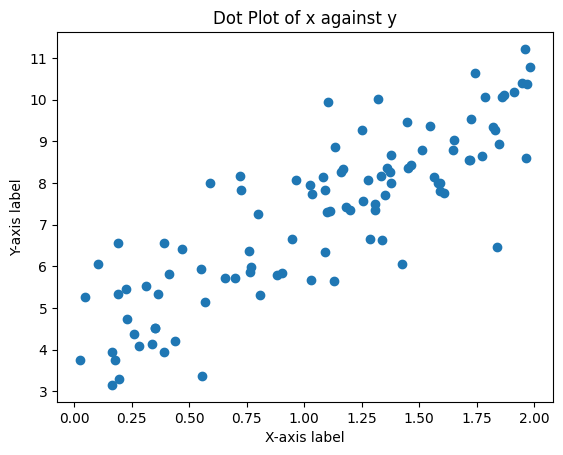

In [6]:
# Create the scatter plot
plt.scatter(X, y)

# Adding labels and title (optional)
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Dot Plot of x against y")

# Display the plot
plt.show()

From the scikit learn library we are going to use the linear regression model. We have already imported the library above.

``` from sklearn.linear_model import LinearRegression```

Then the first step is to create the Linear Regression Model Object to work with. This step initializes the model but does not fit it to the data.


In [7]:
from sklearn.linear_model import LinearRegression

Let's take a look at what we have using `?` we can also lookup the libraries or funcitons on google.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [8]:
ln_reg = LinearRegression()

We need to "train" our model, let it learn from data. In the next step we will train the model by finding the best parameters that fit the training data.

Find how to do it from the help file we accessed above.

In [9]:
ln_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


It's often helpful to look at the documentation to see what we can do with our object.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Here, we can look at the coefficients and other statistics of the model, use the documentation to do so.

In [10]:
print("Coefficients:", ln_reg.coef_)
print("Intercept:", ln_reg.intercept_)
print("R squared:", ln_reg.score(X, y))

Coefficients: [[2.92137854]]
Intercept: [4.10735942]
R squared: 0.7262405928163607


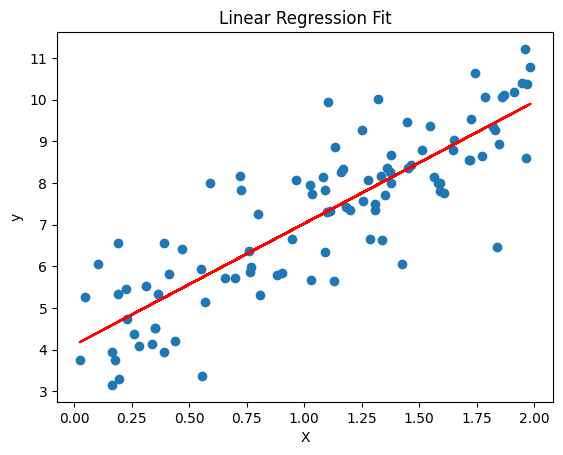

In [11]:
#plot X and y with the regression line
plt.scatter(X, y)
plt.plot(X, ln_reg.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.show()

Next we use the model to predict values using `.predict()`


In [12]:
y_predict = ln_reg.predict(X)

Did we do a good job? How would we know? We need a way to assess our predictions. There are many approaches and scikitlearn gives us functions to use them.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

We have laready imported this library to use:

```
from sklearn.metrics import mean_squared_error
```

In [13]:
mse = mean_squared_error(y, y_predict)
print("Mean Squared Error on Training Data:", mse)

Mean Squared Error on Training Data: 1.040389815275567


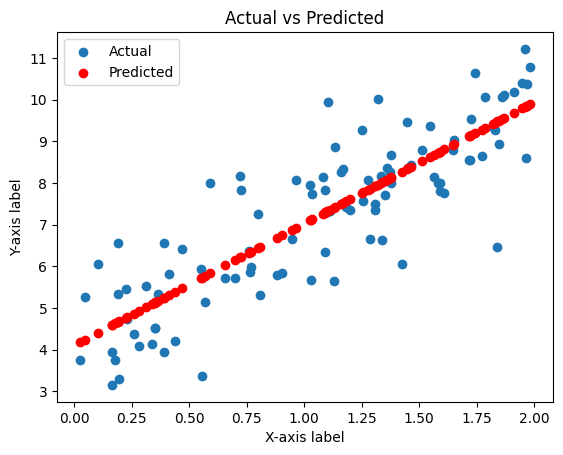

In [14]:
y_predictions = ln_reg.predict(X)

plt.scatter(X, y, label="Actual")
plt.scatter(X, y_predictions, label="Predicted", color="red")

plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Actual vs Predicted")
plt.legend()

plt.show()


Easy right? Your turn:

#### Exercise

Fit a linear regresion model to predict house prices in boston.

Upload your data using the "files" section on the menu to the right. Run the code below to load the data into a dataframe.

In [15]:
# Step 1: Load the Data
boston_data = pd.read_csv('2_Boston.csv')

In [18]:
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [23]:
# Step 2: Select the Feature and Target Variables
X_boston = boston_data[["rm", "age"]]  # "RM" feature (average number of rooms) and "age" feature
y_boston = boston_data["medv"]  # "MEDV" target (median value of owner-occupied homes)

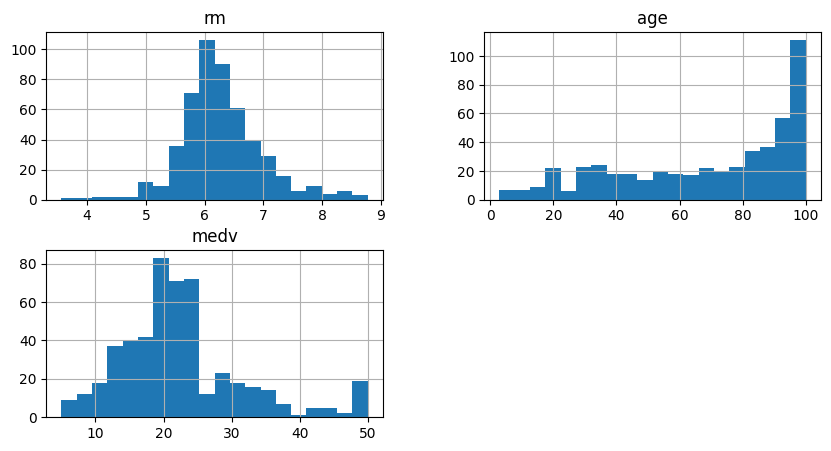

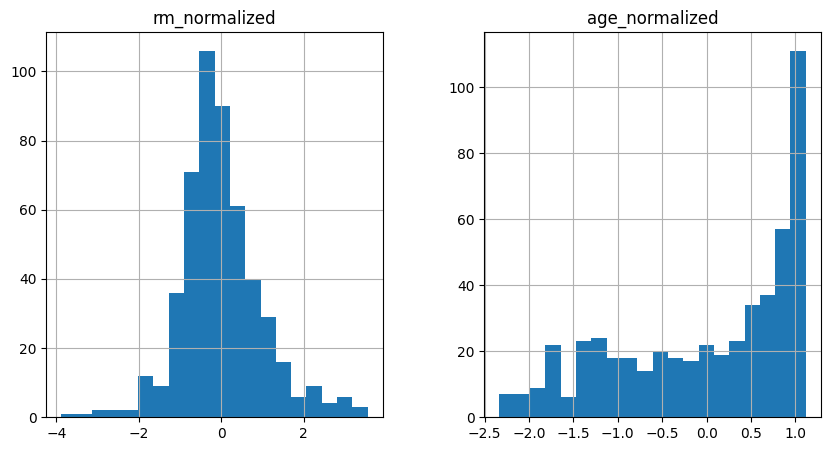

In [33]:
#plot histogram of rm and age in two subplots
boston_data[["rm", "age","medv"]].hist(bins=20, figsize=(10, 5))
boston_data["rm_normalized"] = (boston_data["rm"] - boston_data["rm"].mean()) / boston_data["rm"].std()
boston_data["age_normalized"] = (boston_data["age"] - boston_data["age"].mean()) / boston_data["age"].std()
boston_data[["rm_normalized", "age_normalized"]].hist(bins=20, figsize=(10, 5)) 
plt.show()

X_boston_norm = boston_data[["rm_normalized", "age_normalized"]]

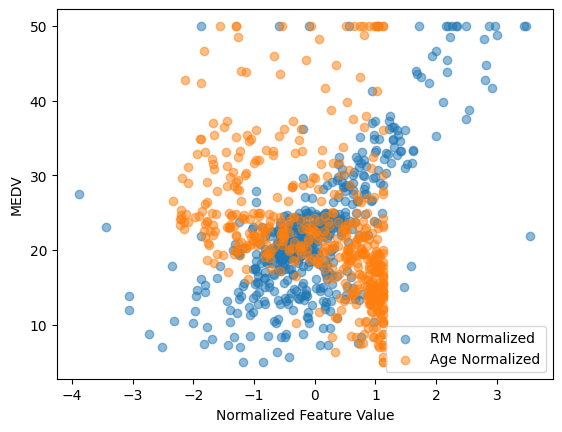

In [32]:
# plot a scatter. X azis 0 to 100, y axis medv, dots of rm_normalized and age_normalized in different colors
plt.scatter(boston_data["rm_normalized"], boston_data["medv"], label="RM Normalized", alpha=0.5)
plt.scatter(boston_data["age_normalized"], boston_data["medv"], label="Age Normalized", alpha=0.5)
plt.xlabel("Normalized Feature Value")
plt.ylabel("MEDV")
plt.legend()
plt.show()

In [31]:
# Step 3: Create the Linear Regression Model Object

boston_ln_reg = LinearRegression()
boston_ln_reg_norm = LinearRegression()

In [35]:
# Step 4: Fit the Model to the Training Data
boston_ln_reg.fit(X_boston,y_boston)
boston_ln_reg_norm.fit(X_boston_norm,y_boston)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
# Step 5: Examine Model Statistics, what is the equation you have fit?
print("Coefficients: ", boston_ln_reg.coef_)
print("Intercept: ", boston_ln_reg.intercept_)
print("R squared: ", boston_ln_reg.score(X, y))
print("Coefficients: ", boston_ln_reg_norm.coef_)
print("Intercept: ", boston_ln_reg_norm.intercept_)
print("R squared: ", boston_ln_reg_norm.score(X_boston_norm, y_boston))

Coefficients:  [ 8.40158122 -0.07277679]
Intercept:  -25.27739905297698
R squared:  0.5302754804141959
Coefficients:  [ 5.903095   -2.04858366]
Intercept:  22.532806324110677
R squared:  0.5302754804141959


In [38]:
# Step 6: Generate predictions with your model
y_boston_medv_predictions = boston_ln_reg.predict(X_boston)
y_boston_medv_norm_predictions = boston_ln_reg_norm.predict(X_boston_norm)

In [39]:
# Step 7: Evaluate the Model
mse_boston = mean_squared_error(y_boston, y_boston_medv_predictions)
mse_boston_norm = mean_squared_error(y_boston, y_boston_medv_norm_predictions)
print("Mean Squared Error:", mse_boston)
print("Mean Squared Error (Normalized):", mse_boston_norm)



Mean Squared Error: 39.653935459101675
Mean Squared Error (Normalized): 39.653935459101675


Here we have a plotting function we can use to try to understand your regression.

In [40]:

def plot_mlr(X, y, lin_reg):
    """
    Plot multiple linear regression projections for each feature in X against y.

    Parameters:
        X (pd.DataFrame): DataFrame with independent variables.
        y (array-like): Dependent variable.
        lin_reg (LinearRegression): Fitted linear regression model.
    """
    n_features = X.shape[1]
    feature_names = X.columns
    coef = lin_reg.coef_
    intercept = lin_reg.intercept_

    # Compute means for all features
    feature_means = X.mean()

    # Set up subplots
    plt.figure(figsize=(6 * n_features, 5))

    for idx, feature in enumerate(feature_names):
        plt.subplot(1, n_features, idx + 1)

        # Create input with all means
        X_const = np.tile(feature_means.values, (len(X), 1))
        X_const = pd.DataFrame(X_const, columns=feature_names)

        # Replace current feature with actual values
        X_const[feature] = X[feature]

        # Compute partial regression line
        y_line = lin_reg.predict(X_const)

        # Plot scatter and regression line
        plt.scatter(X[feature], y, color='blue', alpha=0.6, label="Observed")
        plt.plot(X[feature], y_line, color='black', label='Regression Line')
        plt.plot(X[feature], lin_reg.predict(X), 'r.', alpha=0.4, label='MLR Prediction')

        plt.xlabel(feature)
        plt.ylabel("Target")
        plt.title(f'Multiple Linear Regression with {feature}')
        plt.legend()

    plt.tight_layout()
    plt.show()


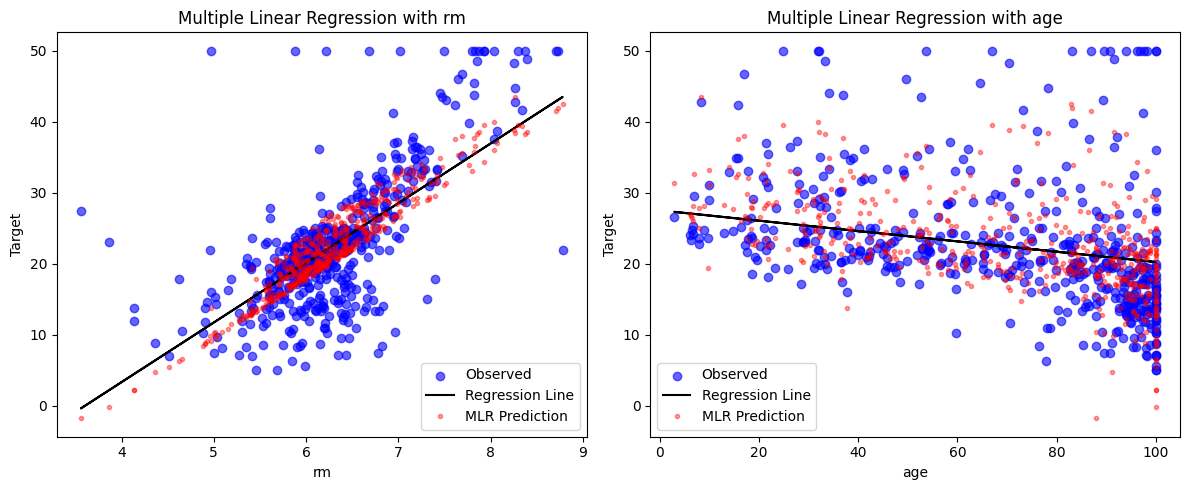

In [41]:
plot_mlr(X_boston,y_boston, boston_ln_reg)

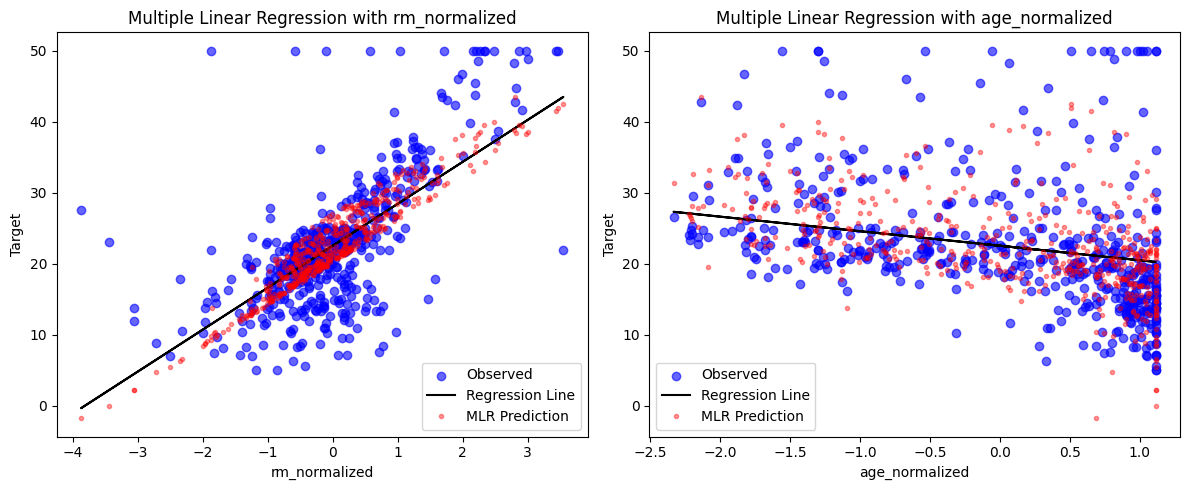

In [42]:
plot_mlr(X_boston_norm,y_boston, boston_ln_reg_norm)

## Let's go back to classification problems from the lectures

Here I'm going to generate two "gaussian clouds" these just mean randomly drawn values.

In [ ]:
# Parameters for the Gaussian clouds
mean1, std1 = 3, 0.5
mean2, std2 = 1, 0.5
num_points = 30

In [ ]:
# Generate the clouds
cloud1_x = np.random.normal(mean1, std1, num_points)
cloud1_y = np.random.normal(mean1, std1, num_points)
cloud2_x = np.random.normal(mean2, std2, num_points)
cloud2_y = np.random.normal(mean2, std2, num_points)

In [ ]:
# Plot the clouds -- without labels
plt.figure(figsize=(12, 8))
plt.scatter(cloud1_x, cloud1_y, label='Cloud', c='black')
plt.scatter(cloud2_x, cloud2_y, label='Cloud', c='black')
plt.title('Two Gaussian Clouds of Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Plot the clouds
plt.figure(figsize=(12, 8))
plt.scatter(cloud1_x, cloud1_y, label='Cloud 1 (Mean=3, Std=1)', c='blue')
plt.scatter(cloud2_x, cloud2_y, label='Cloud 2 (Mean=2, Std=2)', c='red')
plt.title('Two Gaussian Clouds of Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


Here are four subplots comparing two Gaussian clouds with different levels of overlap:


In [ ]:
# Parameters for clouds with varying overlaps
# (mean, std) pairs
# check we use the same means as previously
params_subplots = [
    [(1, 3), (3, 3)],  # High overlap
    [(1, 2), (3, 2)],    # Moderate overlap
    [(1, 0.75), (3, 0.75)],    # Low overlap
    [(1, 0.5), (3, 0.5)],    # Very minimal overlap
]

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('Comparison of Two Gaussian Clouds with Different Levels of Overlap')

for i, ax in enumerate(axs.ravel()):
    cloud1_params, cloud2_params = params_subplots[i]

    cloud1_x = np.random.normal(cloud1_params[0], cloud1_params[1], num_points)
    cloud1_y = np.random.normal(cloud1_params[0], cloud1_params[1], num_points)
    cloud2_x = np.random.normal(cloud2_params[0], cloud2_params[1], num_points)
    cloud2_y = np.random.normal(cloud2_params[0], cloud2_params[1], num_points)

    ax.scatter(cloud1_x, cloud1_y, label=f'Cloud A (Mean={cloud1_params[0]}, Std={cloud1_params[1]})', c='blue')
    ax.scatter(cloud2_x, cloud2_y, label=f'Cloud B (Mean={cloud2_params[0]}, Std={cloud2_params[1]})', c='red')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


Subplot 1 (Top Left): High overlap between the clouds. Both clouds have means close to each other.

Subplot 2 (Top Right): Moderate overlap. The clouds are more distinct compared to the first subplot but still have some overlap.

Subplot 3 (Bottom Left): Low overlap. The clouds are quite separated, with minimal points overlapping.

Subplot 4 (Bottom Right): Very minimal to no overlap. The two clouds are distinctly separated.

In [ ]:
# Parameters for clouds with varying correlations
correlations = [0, 0.6, 0.9, -0.9]
mean, std = 2, 0.5

fig, axs = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('Effect of Increasing Correlation Between X and Y Coordinates in Gaussian Clouds')

for i, ax in enumerate(axs.ravel()):
    correlation = correlations[i]
    cov_matrix = [[std**2, std * std * correlation], [std * std * correlation, std**2]]

    # Generate correlated Gaussian clouds
    cloud1 = np.random.multivariate_normal([mean, mean], cov_matrix, num_points)
    #cloud2 = np.random.multivariate_normal([mean + 1, mean + 1], cov_matrix, num_points)

    ax.scatter(cloud1[:, 0], cloud1[:, 1], label=f'Cloud A (Corr={correlation})', c='blue')
    #ax.scatter(cloud2[:, 0], cloud2[:, 1], label=f'Cloud B (Corr={correlation})', c='red')
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [ ]:
# Parameters for clouds with varying correlations
correlations = [0, 0.6, 0.9, -0.9]
mean, std = 2, 0.5

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Effect of Increasing Correlation Between X and Y Coordinates in Gaussian Clouds')

for i, ax in enumerate(axs.ravel()):
    correlation = correlations[i]
    cov_matrix = [[std**2, std * std * correlation], [std * std * correlation, std**2]]

    # Generate correlated Gaussian clouds
    cloud1 = np.random.multivariate_normal([mean, mean], cov_matrix, num_points)
    cloud2 = np.random.multivariate_normal([mean + 1, mean + 1], cov_matrix, num_points)

    ax.scatter(cloud1[:, 0], cloud1[:, 1], label=f'Cloud A (Corr={correlation})', c='blue')
    ax.scatter(cloud2[:, 0], cloud2[:, 1], label=f'Cloud B (Corr={correlation})', c='red')
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


## Ok let's look at modelling

In [ ]:
# Define means and standard deviations for two clouds
mean_cloud1, std_cloud1 = 2, 1
mean_cloud2, std_cloud2 = 3, 1

# Generate the clouds
cloud1 = np.random.multivariate_normal([mean_cloud1, mean_cloud1], [[std_cloud1**2, 0], [0, std_cloud1**2]], num_points)
cloud2 = np.random.multivariate_normal([mean_cloud2, mean_cloud2], [[std_cloud2**2, 0], [0, std_cloud2**2]], num_points)

# Combine the clouds and create labels
X = np.vstack((cloud1, cloud2))
y = np.array([0] * num_points + [1] * num_points)




In [ ]:
# Create DataFrame
df = pd.DataFrame(X, columns=["x1", "x2"])
df["label"] = y

# Display first few rows
print(df.head())

In [ ]:
# Display last few rows
print(df.tail())

Now we have our data, let's use linear regresission to create a model:

* Initialise and fit a linear regression model called reg_model


In [ ]:
# create your model
reg_model =

In [ ]:
# fit your model

In [ ]:
# Get the coefficients and intercept, we will need these:
print("Intercept: ", reg_model.intercept_)
print("Coefficients: ",  reg_model.coef_)


In [ ]:
# create some predictions
df["predictions"] =

In [ ]:
df.head()

These aren't yet classification decisions, let's apply the bayes classifier rule.

``` (y_hat >= 0.5).astype(int) ```




In [ ]:
df["decision"] =

In [ ]:
df.head()

We Can also think about the equation this rule implies.

In [ ]:
# Calculate the decision boundary
print(f"p = {reg_model.intercept_: .2f} + {reg_model.coef_[0]: .2f} * x0 +  {reg_model.coef_[1]: .2f} * x1")
print(f"0.5 = {reg_model.intercept_: .2f} + {reg_model.coef_[0]: .2f} * x0 +  {reg_model.coef_[1]: .2f} * x1")
print(f"(0.5 - {reg_model.intercept_: .2f} - {reg_model.coef_[0]: .2f} * x0) /  {reg_model.coef_[1]: .2f} = x1")

Let's take a look on a plot.

In [ ]:
x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_boundary = (0.5 - reg_model.intercept_ - reg_model.coef_[0] * x_boundary ) / reg_model.coef_[1]

In [ ]:
# Plot the points and decision boundary
plt.figure(figsize=(12, 8))
plt.scatter(cloud1[:, 0], cloud1[:, 1], label='Cloud 1 (Label=0)', c='blue')
plt.scatter(cloud2[:, 0], cloud2[:, 1], label='Cloud 2 (Label=1)', c='red')
plt.plot(x_boundary, y_boundary, label='Decision Boundary', c='black', linestyle='--')
plt.title('Two Gaussian Clouds with Linear Regression Decision Boundary')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

Next we want to look at assessing our model.

In [ ]:
y_pred = df["predictions"]
# Create a colormap to represent the predicted values
cmap = plt.cm.get_cmap('coolwarm')

# Plot the actual labels (Left Plot)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.scatter(cloud1[:, 0], cloud1[:, 1], label='Cloud 1 (Label=0)', c='blue')
plt.scatter(cloud2[:, 0], cloud2[:, 1], label='Cloud 2 (Label=1)', c='red')
plt.plot(x_boundary, y_boundary, label='Decision Boundary', c='black', linestyle='--')
plt.title('Two Gaussian Clouds with Actual Labels')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)

# Plot the predicted values (Right Plot)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cmap, edgecolors='k')
plt.plot(x_boundary, y_boundary, label='Decision Boundary', c='black', linestyle='--')
plt.title('Two Gaussian Clouds with Predicted Values')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(label='Predicted Value')
plt.grid(True)

plt.show()

Let's give KNN a try using scikitlearn:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

```
from sklearn.neighbors import KNeighborsClassifier
```

In [ ]:
# Create and train a KNN classifier with k = n_neighbors =5
knn_model =

In [ ]:
# Generate predictions and check predictions
y_pred_k =

We can also use `pred_proba` to generate probabilities.



In [ ]:
y_pred_k_p =

Let's quickly update out dataframe:

In [ ]:
df["predictions_k"] = y_pred_k_p[:,1]
df['decision_k'] = y_pred_k
df.head()

Let's take a look at this new plot.

In [ ]:
# Create a mesh grid to visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the labels for the mesh grid
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the actual labels (Left Plot)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.scatter(cloud1[:, 0], cloud1[:, 1], label='Cloud 1 (Label=0)', c='blue')
plt.scatter(cloud2[:, 0], cloud2[:, 1], label='Cloud 2 (Label=1)', c='red')
plt.title('Two Gaussian Clouds with Actual Labels')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)

# Plot the decision boundary (Right Plot)
plt.subplot(1, 2, 2)
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_k_p[:,1], cmap=cmap, edgecolors='k')
plt.title('Two Gaussian Clouds with KNN Decision Boundary (k=5)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)

plt.show()




Run the below cells that define functions for plotting we will use later.

In [ ]:
def plot_decision_boundary(X, y, model, ax, threshold=0.5):
    # Create a mesh grid to visualize the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Handle the thresholding differently for Linear Regression and KNN
    if isinstance(model, LinearRegression):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = (Z > threshold).astype(int)
        Z = Z.reshape(xx.shape)
        y_pred = model.predict(X)
        y_pred = (y_pred > threshold).astype(int)
    elif isinstance(model, KNeighborsClassifier):
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = (Z > threshold).astype(int)
        Z = Z.reshape(xx.shape)
        y_pred_probs = model.predict_proba(X)[:, 1]
        y_pred = (y_pred_probs > threshold).astype(int)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        y_pred = model.predict(X)

    # Plot the actual labels
    ax.scatter(X[y == 0, 0], X[y == 0, 1],  c='blue')
    ax.scatter(X[y == 1, 0], X[y == 1, 1],  c='red')

    # Plot the decision boundary
    cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    ax.scatter(X[(y_pred == y) & (y == 0), 0], X[(y_pred == y) & (y == 0), 1], label='Cloud 1 (Label=0) Correct', c='blue')
    ax.scatter(X[(y_pred == y) & (y == 1), 0], X[(y_pred == y) & (y == 1), 1], label='Cloud 2 (Label=1) Correct', c='red')
    ax.scatter(X[(y_pred != y) & (y == 0), 0], X[(y_pred != y) & (y == 0), 1], label='Cloud 1 (Label=0) Incorrect', c='blue', marker='x')
    ax.scatter(X[(y_pred != y) & (y == 1), 0], X[(y_pred != y) & (y == 1), 1], label='Cloud 2 (Label=1) Incorrect', c='red', marker='x')
    ax.set_title(f'Two Gaussian Clouds with {model.__class__.__name__} Decision Boundary')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.legend()
    ax.grid(True)

    # Calculate and print the accuracies
    overall_accuracy = (y_pred == y).mean()
    accuracy_class_0 = ((y_pred == y) & (y == 0)).sum() / (y == 0).sum()
    accuracy_class_1 = ((y_pred == y) & (y == 1)).sum() / (y == 1).sum()

    print(f"Overall Accuracy: {overall_accuracy:.2%}")
    print(f"Accuracy for Class 0 (Cloud 1): {accuracy_class_0:.2%}")
    print(f"Accuracy for Class 1 (Cloud 2): {accuracy_class_1:.2%}")



def plot_decision_boundary_wrapper(X, y, model, threshold=0.5):
    fig, ax = plt.subplots(figsize=(10, 8))
    plot_decision_boundary(X, y, model, ax, threshold)
    plt.show()



In [ ]:
# Allowed to adjust for custom plot limits and axes
def plot_dgp_side_by_side(rv1, rv2, x_min, x_max, y_min, y_max, ax):
    x = np.linspace(x_min, x_max, 100)
    y = np.linspace(y_min, y_max, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    pdf1 = rv1.pdf(pos)
    pdf2 = rv2.pdf(pos)

    c1 = ax.contour(X, Y, pdf1, levels=10, colors='blue')
    c2 = ax.contour(X, Y, pdf2, levels=10, colors='red')

    h1,_ = c1.legend_elements()
    h2,_ = c2.legend_elements()
    ax.legend([h1[0], h2[0]], ['Cloud 1', 'Cloud 2'])

    ax.set_title('Kernel Plots for the Data Generating Process')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

def plot_sample_side_by_side(cloud1, cloud2, x_min, x_max, y_min, y_max, ax):
    ax.scatter(cloud1[:, 0], cloud1[:, 1], color='blue', label='Cloud 1', s=50)
    ax.scatter(cloud2[:, 0], cloud2[:, 1], color='red', label='Cloud 2', s=50)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()
    ax.set_title('Scatter Plot of Clouds')


def plot_dgp_and_sample_side_by_side(rv1, rv2, cloud1, cloud2):
    # Define the plot limits based on means and covariances of the distributions
    means = [rv1.mean, rv2.mean]
    covs = [rv1.cov, rv2.cov]
    stds = [np.sqrt(np.diag(cov)) for cov in covs]

    x_min = min([mean[0] - 3*std[0] for mean, std in zip(means, stds)])
    x_max = max([mean[0] + 3*std[0] for mean, std in zip(means, stds)])
    y_min = min([mean[1] - 3*std[1] for mean, std in zip(means, stds)])
    y_max = max([mean[1] + 3*std[1] for mean, std in zip(means, stds)])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot DGP on ax1
    plot_dgp_side_by_side(rv1, rv2, x_min, x_max, y_min, y_max, ax1)

    # Plot Sample on ax2
    plot_sample_side_by_side(cloud1, cloud2, x_min, x_max, y_min, y_max, ax2)

    plt.tight_layout()
    plt.show()

def gen_data_and_plot(mean_cloud1, std_cloud1, corr_cloud1, mean_cloud2, std_cloud2, corr_cloud2, n):
    # Generate the clouds
    rv1 = multivariate_normal([mean_cloud1, mean_cloud1], [[std_cloud1**2, corr_cloud1 * std_cloud1**2], [corr_cloud1 * std_cloud1**2, std_cloud1**2]])
    rv2 = multivariate_normal([mean_cloud2, mean_cloud2], [[std_cloud2**2, corr_cloud2 * std_cloud2**2], [corr_cloud2 * std_cloud2**2, std_cloud2**2]])

    cloud1 = rv1.rvs(n_samples)
    cloud2 = rv2.rvs(n_samples)

    # Combine the clouds and create labels
    X = np.vstack((cloud1, cloud2))
    y = np.array([0] * n_samples + [1] * n_samples)

    plot_dgp_and_sample_side_by_side(rv1, rv2, cloud1, cloud2)

    return X, y




## Exercises

In each of the below cells I will generate some randome data in two classes. You get to see the process that generates the data, as we plot the expected density.

Your job is, find the model that you think does the best job of drawing a decision boundary. You can explore the linear model, KNN with different k.

You can use ``plot_decision_boundary_wrapper(X, y, model)`` to see the boundary.

Important, you are trying to represent the true data generation process, so that we will do well for new data, not maximise the reported accuracy.

**Case 1: Two standard clouds:**

In [ ]:
# Define means and standard deviations for two clouds
mean_cloud1, std_cloud1, corr_cloud1 = 2, 1, 0
mean_cloud2, std_cloud2, corr_cloud2 = 3, 1, 0
n_samples = 100

X1, y1 = gen_data_and_plot(mean_cloud1, std_cloud1, corr_cloud1, mean_cloud2, std_cloud2, corr_cloud2, n_samples)


In [ ]:
# Write your code here:

**Case 2: Two correlated clouds:**

In [ ]:
# Define means and standard deviations for two clouds
mean_cloud1, std_cloud1, corr_cloud1 = 2, 1, 0.7
mean_cloud2, std_cloud2, corr_cloud2 = 3, 1, 0.7
n_samples = 100

X2, y2 = gen_data_and_plot(mean_cloud1, std_cloud1, corr_cloud1, mean_cloud2, std_cloud2, corr_cloud2, n_samples)

In [ ]:
# Write your code here:

**Case 3: Two clouds with different correlations**

In [ ]:
# Define means and standard deviations for two clouds
mean_cloud1, std_cloud1, corr_cloud1 = 2, 1, 0.7
mean_cloud2, std_cloud2, corr_cloud2 = 3, 1, -0.7
n_samples = 100

X3, y3 = gen_data_and_plot(mean_cloud1, std_cloud1, corr_cloud1, mean_cloud2, std_cloud2, corr_cloud2, n_samples)

In [ ]:
# Write your code here:

**Case 4: Low sample size**

In [ ]:
# Define means and standard deviations for two clouds
mean_cloud1, std_cloud1, corr_cloud1 = 2, 1, 0.7
mean_cloud2, std_cloud2, corr_cloud2 = 3, 1, -0.7
n_samples = 5

X4, y4 = gen_data_and_plot(mean_cloud1, std_cloud1, corr_cloud1, mean_cloud2, std_cloud2, corr_cloud2, n_samples)

In [ ]:
# Write your code here:

We can also adjust the threshold for decision making, we can provide this as an input to plot_decision_boundary: ``plot_decision_boundary_wrapper(X, y, model, threshold)``

Important, you are trying to represent the true data generation process, so that we will do well for new data, not maximise the reported accuracy. But you must all red classes correct (class 2)!